# Korean NLP

[Data source](https://play.google.com/store/apps/details?id=com.facebook.katana&hl=ko&gl=US&showAllReviews=true)

[web cralwer](http://localhost:8888/notebooks/Documents/Git/WebCrawler/Google%20App%20Play%20Web%20Scraping.ipynb)

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt

import emoji

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import urllib.request

In [2]:
import konlpy

In [3]:
from konlpy.utils import pprint

!pip install soylemma

In [4]:
from soylemma import Lemmatizer

In [5]:
lemmatizer = Lemmatizer()
lemmatizer.analyze('준다는데')

[(('주', 'Verb'), ('ㄴ다는데', 'Eomi')), (('줄', 'Verb'), ('ㄴ다는데', 'Eomi'))]

In [45]:
file = r"/Users/reejungkim/Documents/Git/WebCrawler/아실에 따르면.xlsx"

In [46]:
df = pd.read_excel(file, index_col=None)

In [47]:
df.head()

,Unnamed: 0,description,link,org_link,pDate,title
0,0,20일(한국시간) 영국 스카이 스포츠에 <b>따르면</b> 살리바는 &quot;조국...,https://www.xportsnews.com/article/1631907,https://www.xportsnews.com/article/1631907,2022-09-20 12:41:00,&apos;임대 전전→폭풍 성장&apos; 아스널 핵심 CB...&quot;월드컵 ...
1,1,부동산 빅데이터 업체 <b>아실에 따르면</b> 지난달 서울 아파트 전월세 매물(2...,http://www.seoulwire.com/news/articleView.html...,http://www.seoulwire.com/news/articleView.html...,2022-09-20 10:34:00,[메타센서] 폭락하는 아파트 어떻게 사는게 유리할까...&apos;경매냐 중개냐&a...
2,2,"부동산 빅데이터 업체 <b>아실에 따르면</b>, 포항의 적정 수요 물량은 2492...",https://biz.chosun.com/real_estate/real_estate...,https://biz.chosun.com/real_estate/real_estate...,2022-09-20 06:01:00,‘미분양 전국 1위’ 포항의 깊어지는 시름
3,3,부동산 빅데이터 업체 <b>아실에 따르면</b> 이날 기준 서구 아파트 전세 물건은...,http://www.incheonin.com/news/articleView.html...,http://www.incheonin.com/news/articleView.html...,2022-09-19 18:00:00,"검단 전셋값 급락, 역전세난 우려... 전용 84㎡ 1.9억까지 떨어져"
4,4,19일 부동산 빅데이터 전문업체 <b>아실에 따르면</b> 전날(18일) 기준 1기...,http://www.sisajournal-e.com/news/articleView....,http://www.sisajournal-e.com/news/articleView....,2022-09-19 17:08:00,8·16대책 발표 한 달···1기 신도시 여전히 혼돈 속


# 탐색적 분석 (EDA) 

In [48]:
df.shape

(1000, 6)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1000 non-null   int64 
 1   description  1000 non-null   object
 2   link         996 non-null    object
 3   org_link     996 non-null    object
 4   pDate        1000 non-null   object
 5   title        1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [50]:
df['pDate'] = pd.to_datetime(df['pDate'])

In [51]:
df['year-m'] = df['pDate'].dt.strftime('%Y-%m')

In [52]:
df.head(2)

,Unnamed: 0,description,link,org_link,pDate,title,year-m
0,0,20일(한국시간) 영국 스카이 스포츠에 <b>따르면</b> 살리바는 &quot;조국...,https://www.xportsnews.com/article/1631907,https://www.xportsnews.com/article/1631907,2022-09-20 12:41:00,&apos;임대 전전→폭풍 성장&apos; 아스널 핵심 CB...&quot;월드컵 ...,2022-09
1,1,부동산 빅데이터 업체 <b>아실에 따르면</b> 지난달 서울 아파트 전월세 매물(2...,http://www.seoulwire.com/news/articleView.html...,http://www.seoulwire.com/news/articleView.html...,2022-09-20 10:34:00,[메타센서] 폭락하는 아파트 어떻게 사는게 유리할까...&apos;경매냐 중개냐&a...,2022-09


In [53]:
import seaborn as sns
sns.set_palette("light:#5A9")

plt.figure(figsize=(5,3))

ax = df.groupby('year-m')['review'].count().plot(kind='bar', color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of reviews added")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(x='at',data=df, hue='star', dodge=False, order=df['at'].sort_values().unique()) 
plt.show()

## 텍스트 정재 Clean texts

### Clean star rating

In [54]:
pd.pivot_table(df,index='year-m',values='title',
               aggfunc ='count', margins=True).to_csv('pvt_asil.csv')

### 명사 추출 (Extract nouns)

kkma과 okt의 다른점

Okt는 Kkma에 비해 비교적 빠른 속도로 처리하지만 지원하는 품사 태그가 적다. 
속도가 중요할 때는 Okt를, 정확한 품사 정보가 필요할 때는 Kkma를 많이 사용.


http://kkma.snu.ac.kr/documents/?doc=postag

In [16]:
from konlpy.tag import Kkma
kkma = Kkma()

from konlpy.tag import Okt
okt = Okt()

print('kkma 사용: {}'.format(kkma.nouns("로그인이 안돼요")))
print('okt 사용: {}'.format(okt.nouns("로그인이 안돼요")))

kkma 사용: ['로그', '로그인', '인']
okt 사용: ['로그인']


In [17]:

from konlpy.tag import Kkma #Twitter

for word in ['했다', '했지만', '하면서도', '했던', '하니까']:
    print(kkma.pos(word))

[('하', 'VV'), ('었', 'EPT'), ('다', 'EFN')]
[('하', 'VV'), ('었', 'EPT'), ('지만', 'ECE')]
[('하면서', 'NNG'), ('도', 'JX')]
[('하', 'VV'), ('었', 'EPT'), ('던', 'EFQ')]
[('하', 'VV'), ('니까', 'ECD')]


In [55]:
df['title_nouns'] = df['title'].apply(lambda x: okt.nouns(x))

In [56]:
df.head(3)

,Unnamed: 0,description,link,org_link,pDate,title,year-m,title_nouns
0,0,20일(한국시간) 영국 스카이 스포츠에 <b>따르면</b> 살리바는 &quot;조국...,https://www.xportsnews.com/article/1631907,https://www.xportsnews.com/article/1631907,2022-09-20 12:41:00,&apos;임대 전전→폭풍 성장&apos; 아스널 핵심 CB...&quot;월드컵 ...,2022-09,"[임대, 전전, 폭풍, 성장, 아스널, 핵심, 월드컵, 꼭]"
1,1,부동산 빅데이터 업체 <b>아실에 따르면</b> 지난달 서울 아파트 전월세 매물(2...,http://www.seoulwire.com/news/articleView.html...,http://www.seoulwire.com/news/articleView.html...,2022-09-20 10:34:00,[메타센서] 폭락하는 아파트 어떻게 사는게 유리할까...&apos;경매냐 중개냐&a...,2022-09,"[메타, 센서, 폭락, 아파트, 경매, 중개]"
2,2,"부동산 빅데이터 업체 <b>아실에 따르면</b>, 포항의 적정 수요 물량은 2492...",https://biz.chosun.com/real_estate/real_estate...,https://biz.chosun.com/real_estate/real_estate...,2022-09-20 06:01:00,‘미분양 전국 1위’ 포항의 깊어지는 시름,2022-09,"[미분, 전국, 위, 포항, 시름]"


### 불용어 정리 Remove Stopwords

stopwords = ['덕분', '안', '중','때문', '짓', '이것', '하', '거', '식', '시', '앱', '뭐', '데','나', '개','페', '주세',
             '이거', '일', '업', '북', '인', '구', '저', '해','해보고','대','여', '페북', '페이스북', '페이스', '수', 
             '전', '제가','제','것','이것' , '좀', '왜','어째서', '재', '때', '계속', '후', '다시', '요','를', '을', 
             '무슨','못','사', '진짜', '제발','비', '자꾸', '츠궁']

with open('/Users/reejungkim/Documents/Git/NLP/한국어불용어100.txt') as f:
    lines = f.readlines()
    result=[]
    for x in lines:
        result.append(x.split('\t')[0])
    f.close()


In [168]:
stopwords = stopwords + result

In [169]:
def removeStopWords(Noun_words):
    unique_Noun_words = set(Noun_words)
    for word in unique_Noun_words:
        if word in stopwords:
            while word in Noun_words: 
                Noun_words.remove(word) 
    return Noun_words

In [170]:
df['nouns'] = df['nouns'].apply(lambda x: removeStopWords(x))

In [171]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

### Counter

In [57]:
from collections import Counter

In [58]:
#카운터 쓰임예제
c = Counter(df.title_nouns[0])
print(c.most_common(10))

[('임대', 1), ('전전', 1), ('폭풍', 1), ('성장', 1), ('아스널', 1), ('핵심', 1), ('월드컵', 1), ('꼭', 1)]


In [59]:
def common_words(df, col, n):
    counts = Counter([item for sublist in df[col] for item in sublist])
    common_words = pd.DataFrame(counts.most_common(n))
    common_words.columns =['Word','count']
    return common_words

In [60]:
common_review = common_words(df, 'title_nouns', 50)

In [61]:
def getCounter(row):
    return dict(Counter(row['title_nouns']))#.most_common

In [62]:
df['counter']= df.apply(lambda row : getCounter(row), axis=1)

#### Counter without weight

In [63]:
df.counter

0      {'임대': 1, '전전': 1, '폭풍': 1, '성장': 1, '아스널': 1,...
1      {'메타': 1, '센서': 1, '폭락': 1, '아파트': 1, '경매': 1,...
2           {'미분': 1, '전국': 1, '위': 1, '포항': 1, '시름': 1}
3                   {'셋값': 1, '급락': 1, '우려': 1, '전용': 1}
4      {'대책': 1, '발표': 1, '달': 1, '기': 1, '신도시': 1, '...
                             ...                        
995    {'서울': 1, '아파트': 1, '매수': 1, '심리': 1, '수급': 1,...
996    {'서울': 1, '아파트': 1, '셋값': 1, '주': 1, '연속': 1, ...
997    {'서울': 1, '아파트': 1, '매수': 1, '심리': 1, '수급': 1,...
998    {'메타': 1, '센서': 1, '대치동': 1, '서울': 1, '집값': 1,...
999    {'부동산': 1, '시장': 1, '거래': 1, '절벽': 1, '언제': 1,...
Name: counter, Length: 1000, dtype: object

def getWeightedCounter(row):
    for key, value in row['counter'].items():
        newvalue = value*row['reviewer_ratings'] + 1
        row['counter'][key] = newvalue

df.apply(lambda row : getWeightedCounter(row), axis=1)

#### Counter weighted by reviewer ratings (likes on the review)

In [183]:
df.counter

0     {'성산동': 1, '공업': 1, '사가': 1, '빌라': 2, '유진': 1,...
1         {'자체': 1, '설치': 1, '파란': 1, '화면': 1, '다해': 1}
2     {'아파트': 1, '실': 1, '거래': 1, '이용': 1, '핸드폰': 1,...
3                           {'요즘': 1, '튕기': 1, '안정': 1}
4                   {'뒤': 1, '가기': 1, '바로': 1, '종료': 1}
                            ...                        
95                 {'거상': 1, '쌤': 1, '성격': 1, '영향력': 1}
96                {'경매': 1, '정보': 1, '등기부': 1, '열람': 1}
97                {'어플': 1, '갑자기': 1, '왜케': 1, '반응': 1}
98                        {'전문가': 1, '분석': 1, '조아욤': 1}
99                                 {'부동산': 1, '최고봉': 1}
Name: counter, Length: 100, dtype: object

## Visualization

In [68]:
import plotly.express as px

fig = px.treemap(common_review, 
           path=['Word'], values='count',
           title='Most commonly used words',
          width=600, height=700)

fig.write_html("NaverNews_asil1.html")
#fig.show()

In [65]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
FONT_PATH = '/Users/reejungkim/Documents/Git/NLP/Korean font ttf/BMHANNA_11yrs_ttf.ttf'

words = common_review.set_index("Word")['count'].to_dict()

In [66]:
wc = WordCloud(background_color='white',width=800, height=400, font_path=FONT_PATH)

## negative reviews

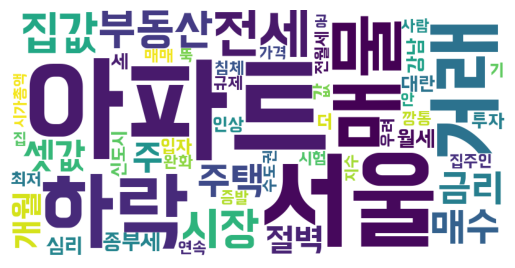

In [67]:
common_words =common_review.set_index("Word")['count'].to_dict()
wordcloud = wc.generate_from_frequencies(common_words)
plt.imshow(wordcloud)
plt.savefig("NaverNews_ASIL.png")
plt.axis('off')
plt.show()
